**Artificial Neural Network (ANN) Model for Multi-Class Classification**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# remove unnecessary column ('Id')
df = df.drop(columns='Id')

In [ ]:
# do a one-hot-encoding process because the label is categorical data
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
# merge the one-hot-encoding results to replace the 'species' column
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
# convert the dataframe to an array
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [ ]:
# separate the attributes and the labels

# select the first 4 columns as attributes
X = dataset[:,0:4]

# select the last 3 columns as labels
y = dataset[:,4:7]

In [ ]:
# normalization

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
# split the dataset into train and test sets
# the ratio is 70% : 30%

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
# build an ANN model architecture
model = Sequential([Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax'),])  # 'softmax' is commonly used for multi-class classification

In [ ]:
# determine the optimizer and loss function of the model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
''' SELECT AND RUN ONE OPTION ONLY! '''

''' Option 1 - with callback '''
# from keras import callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True

callbacks = myCallback()

model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 1.0865 - accuracy: 0.3238
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0430 - accuracy: 0.3619
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0061 - accuracy: 0.6286
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9782 - accuracy: 0.6571
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9533 - accuracy: 0.6571
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9291 - accuracy: 0.6571
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9046 - accuracy: 0.6571
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8798 - accuracy: 0.6571
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8540 - accuracy: 0.6571
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8281 - accuracy: 0.6571
Epoch 11/50
4/4 [======================

In [ ]:
''' SELECT AND RUN ONE OPTION ONLY! '''

''' Option 2 - manually, without callback '''
# train the model
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 1.0741 - accuracy: 0.3238
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0360 - accuracy: 0.6190
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0014 - accuracy: 0.6762
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9702 - accuracy: 0.6762
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9370 - accuracy: 0.6762
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9057 - accuracy: 0.6762
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8756 - accuracy: 0.6762
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8428 - accuracy: 0.6762
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8099 - accuracy: 0.6762
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7791 - accuracy: 0.6762
Epoch 11/100
4/4 [===========

In [ ]:
# evaluate the accuracy of model predictions on test set
model.evaluate(X_test, Y_test)  # (loss, accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.1205 - accuracy: 0.9556


[0.12049190700054169, 0.9555555582046509]

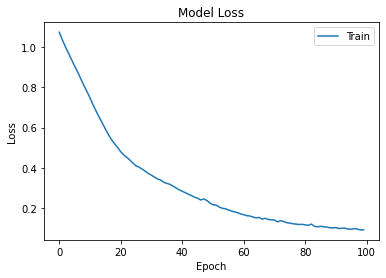

In [ ]:
# the 'history' object holds information about the model's accuracy and loss at each epoch in the training process
# so that we can plot the accuracy and loss of the model

import matplotlib.pyplot as plt

# plot the loss of the model
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

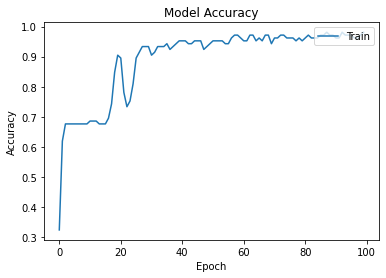

In [ ]:
# plot the accuracy of the model
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()